### Import Libraries

In [1]:
import pandas as pd
import pathlib

import sys
sys.path.append("../utils")
from validate_utils import create_classification_profiles

### Load Cell Health Profile Labels

In [2]:
cell_health_hash = "30ea5de393eb9cfc10b575582aa9f0f857b44c59"
cell_health_labels_link = f"https://raw.github.com/broadinstitute/cell-health/{cell_health_hash}/1.generate-profiles/data/consensus/cell_health_median.tsv.gz"

cell_health_labels = pd.read_csv(cell_health_labels_link, compression="gzip", sep="\t")
cell_health_labels

,Metadata_profile_id,Metadata_pert_name,Metadata_cell_line,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,...,vb_num_live_cells,vb_percent_all_apoptosis,vb_percent_caspase_dead_only,vb_percent_dead,vb_percent_dead_only,vb_percent_early_apoptosis,vb_percent_late_apoptosis,vb_percent_live,vb_ros_back_mean,vb_ros_mean
0,profile_0,AKT1-1,A549,0.008156,0.587977,0.018820,0.381501,0.176564,0.187675,-0.170616,...,0.399842,0.000000,-0.118976,-0.132871,-0.121090,0.000000,0.000000,0.132882,0.806970,1.293984
1,profile_1,AKT1-2,A549,0.056667,1.264627,0.241450,0.568443,0.235304,0.372684,-0.276888,...,0.101670,0.318027,0.621374,0.100032,0.074036,0.132751,0.467027,-0.099917,0.558041,1.151867
2,profile_2,ARID1B-1,A549,0.111163,1.092964,0.151393,0.290203,0.402121,0.481700,-0.276980,...,0.080701,0.339100,0.598093,0.055951,0.042014,0.165161,0.247058,-0.055920,-0.393937,0.103202
3,profile_3,ARID1B-2,A549,-0.061528,0.320829,-0.091007,0.141819,-0.378769,-0.288693,-0.108741,...,0.265754,0.098699,0.371930,-0.063935,-0.055160,0.138654,0.000000,0.063946,0.210005,0.055291
4,profile_4,ATF4-1,A549,3.967818,0.003400,3.268615,-2.246887,2.891737,2.878938,2.853995,...,-2.343919,0.000000,-0.089544,0.141535,0.131393,0.000000,0.000000,-0.141397,-0.631390,0.106477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,profile_352,TXN-2,HCC44,-0.342210,0.215623,0.375192,0.900283,-0.116349,-0.083793,0.207844,...,1.568620,-0.409888,0.148385,-0.519448,-0.372714,-0.136141,-0.502358,0.520090,0.182738,-0.116806
353,profile_353,XBP-1,HCC44,-0.247848,0.564827,-0.422787,0.780852,-0.074603,0.000000,-0.123090,...,0.344139,0.172909,0.839550,-0.212904,-0.245979,0.417994,0.028582,0.213691,0.245257,0.105633
354,profile_354,XBP-2,HCC44,-0.349572,-0.303116,-0.458782,0.434831,-0.157653,-0.058808,-0.404611,...,1.341318,-0.069684,0.540557,-0.146842,-0.288259,-0.179506,0.047976,0.147173,0.744648,0.023499
355,profile_355,YAP1-1,HCC44,-0.240422,0.408734,-0.351545,0.387100,-0.132059,0.002797,-0.059520,...,0.091803,-0.155056,-0.025451,-0.097891,-0.080691,-0.227172,-0.114292,0.098480,0.451868,0.127519


### Create Classification Profiles

In [4]:
cell_health_data_hash = "4ee08b16f4b5c5266309a295b0a1697f0b9540b8"
plate_classifications_dir_link = f"https://github.com/WayScience/cell-health-data/raw/{cell_health_data_hash}/4.classify-features/plate_classifications"
plate_names = ["SQ00014610", "SQ00014611", "SQ00014612", "SQ00014613", "SQ00014614", "SQ00014615", "SQ00014616", "SQ00014617", "SQ00014618"]

cell_line_plates = {
    "A549": ["SQ00014610", "SQ00014611", "SQ00014612"],
    "ES2": ["SQ00014613", "SQ00014614", "SQ00014615"],
    "HCC44": ["SQ00014616", "SQ00014617", "SQ00014618"],
}

classification_profiles = create_classification_profiles(plate_classifications_dir_link, cell_line_plates)
classification_profiles

Creating classification profiles for cell line A549
Loading plate SQ00014610
Loading plate SQ00014611
Loading plate SQ00014612
Averaging classification across perturbation metadata...
Creating classification profiles for cell line ES2
Loading plate SQ00014613
Loading plate SQ00014614
Loading plate SQ00014615
Averaging classification across perturbation metadata...
Creating classification profiles for cell line HCC44
Loading plate SQ00014616
Loading plate SQ00014617
Loading plate SQ00014618
Averaging classification across perturbation metadata...


,Metadata_pert_name,Metadata_cell_line,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,AKT1-1,A549,0.054932,0.027755,0.021307,0.048169,0.116542,0.027095,0.040155,0.030093,0.221322,0.019687,0.040099,0.037670,0.098610,0.129647,0.041857,0.045061
1,AKT1-2,A549,0.052757,0.026695,0.022417,0.047275,0.113333,0.026610,0.041179,0.034239,0.233669,0.021312,0.039802,0.036686,0.089843,0.128045,0.041199,0.044936
2,ARID1B-1,A549,0.040267,0.028365,0.021202,0.047656,0.119522,0.024333,0.039460,0.035141,0.290153,0.028437,0.035434,0.040248,0.044184,0.136870,0.033468,0.035259
3,ARID1B-2,A549,0.045109,0.030562,0.021584,0.041333,0.123428,0.027050,0.039057,0.028491,0.293695,0.026684,0.033261,0.043536,0.045784,0.124731,0.036990,0.038706
4,ATF4-1,A549,0.026970,0.035827,0.016918,0.013856,0.090874,0.028103,0.019467,0.016642,0.508466,0.039001,0.016502,0.052635,0.012241,0.061432,0.035789,0.025276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,XBP-1,HCC44,0.032277,0.027736,0.029891,0.053386,0.107091,0.041403,0.038645,0.041323,0.282075,0.041348,0.033903,0.048170,0.044153,0.108327,0.035608,0.034663
353,XBP-2,HCC44,0.032669,0.029002,0.031823,0.054948,0.106691,0.039883,0.036857,0.046972,0.265102,0.041838,0.035828,0.047439,0.045634,0.112850,0.035914,0.036549
354,YAP1-1,HCC44,0.034511,0.027847,0.037634,0.050009,0.087623,0.043881,0.047348,0.056616,0.191724,0.036977,0.032514,0.039765,0.137421,0.088149,0.047577,0.040405
355,YAP1-2,HCC44,0.033771,0.028334,0.030037,0.056260,0.105229,0.038985,0.033854,0.043182,0.256354,0.042508,0.036015,0.045088,0.074877,0.092741,0.042136,0.040629


In [5]:
final_profile_matrix = pd.merge(cell_health_labels, classification_profiles, on=["Metadata_pert_name", "Metadata_cell_line"])
final_profile_matrix

,Metadata_profile_id,Metadata_pert_name,Metadata_cell_line,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,...,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,profile_0,AKT1-1,A549,0.008156,0.587977,0.018820,0.381501,0.176564,0.187675,-0.170616,...,0.040155,0.030093,0.221322,0.019687,0.040099,0.037670,0.098610,0.129647,0.041857,0.045061
1,profile_1,AKT1-2,A549,0.056667,1.264627,0.241450,0.568443,0.235304,0.372684,-0.276888,...,0.041179,0.034239,0.233669,0.021312,0.039802,0.036686,0.089843,0.128045,0.041199,0.044936
2,profile_2,ARID1B-1,A549,0.111163,1.092964,0.151393,0.290203,0.402121,0.481700,-0.276980,...,0.039460,0.035141,0.290153,0.028437,0.035434,0.040248,0.044184,0.136870,0.033468,0.035259
3,profile_3,ARID1B-2,A549,-0.061528,0.320829,-0.091007,0.141819,-0.378769,-0.288693,-0.108741,...,0.039057,0.028491,0.293695,0.026684,0.033261,0.043536,0.045784,0.124731,0.036990,0.038706
4,profile_4,ATF4-1,A549,3.967818,0.003400,3.268615,-2.246887,2.891737,2.878938,2.853995,...,0.019467,0.016642,0.508466,0.039001,0.016502,0.052635,0.012241,0.061432,0.035789,0.025276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,profile_352,TXN-2,HCC44,-0.342210,0.215623,0.375192,0.900283,-0.116349,-0.083793,0.207844,...,0.042297,0.045487,0.242511,0.044597,0.034945,0.048240,0.061386,0.106988,0.041195,0.040591
353,profile_353,XBP-1,HCC44,-0.247848,0.564827,-0.422787,0.780852,-0.074603,0.000000,-0.123090,...,0.038645,0.041323,0.282075,0.041348,0.033903,0.048170,0.044153,0.108327,0.035608,0.034663
354,profile_354,XBP-2,HCC44,-0.349572,-0.303116,-0.458782,0.434831,-0.157653,-0.058808,-0.404611,...,0.036857,0.046972,0.265102,0.041838,0.035828,0.047439,0.045634,0.112850,0.035914,0.036549
355,profile_355,YAP1-1,HCC44,-0.240422,0.408734,-0.351545,0.387100,-0.132059,0.002797,-0.059520,...,0.047348,0.056616,0.191724,0.036977,0.032514,0.039765,0.137421,0.088149,0.047577,0.040405


In [7]:
pearson_corr = final_profile_matrix.corr(method="spearman")
pearson_corr

,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,cc_all_nucleus_roundness_mean,cc_cc_early_mitosis,cc_cc_g1,...,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
cc_all_high_h2ax,1.000000,0.160648,0.337160,-0.436626,0.913750,0.785213,0.567444,-0.051756,0.238304,0.296623,...,-0.087183,-0.268425,0.104909,0.195313,-0.353023,0.195481,-0.228159,0.156607,-0.083348,-0.326698
cc_all_large_notround_polynuclear_mean,0.160648,1.000000,0.465302,0.081173,0.127971,0.143024,0.039419,-0.164129,0.049414,-0.214361,...,0.102455,-0.130454,-0.018753,-0.240559,0.055684,-0.135937,0.144401,0.267303,-0.106110,0.091299
cc_all_large_round_polyploid_mean,0.337160,0.465302,1.000000,-0.234592,0.339535,0.373004,0.343699,0.147522,0.061421,-0.042056,...,0.001632,-0.240829,0.167325,-0.138639,-0.208032,0.122674,-0.045893,0.011517,-0.050661,-0.033769
cc_all_n_objects,-0.436626,0.081173,-0.234592,1.000000,-0.399554,-0.464422,-0.269158,0.109307,-0.384206,-0.320446,...,0.060533,0.460663,-0.164614,-0.001323,0.524828,-0.474915,0.378348,0.152390,-0.221309,0.336101
cc_all_n_spots_h2ax_mean,0.913750,0.127971,0.339535,-0.399554,1.000000,0.884987,0.610786,0.067344,0.275151,0.351403,...,-0.110763,-0.243319,0.175849,0.192661,-0.359933,0.247221,-0.255707,0.108104,-0.144199,-0.361839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MetaphaseAlignment,0.195481,-0.135937,0.122674,-0.474915,0.247221,0.280567,0.193951,0.110655,0.081583,0.181321,...,0.098913,-0.226745,0.329638,0.188560,-0.545692,1.000000,-0.470323,-0.161881,0.107146,-0.510411
OutOfFocus,-0.228159,0.144401,-0.045893,0.378348,-0.255707,-0.344333,-0.333602,-0.076614,-0.026688,-0.337586,...,0.335799,0.477227,-0.634105,-0.149737,0.509119,-0.470323,1.000000,0.181694,0.039988,0.423726
Polylobed,0.156607,0.267303,0.011517,0.152390,0.108104,0.092924,-0.036373,-0.426798,0.085355,-0.074504,...,0.415458,-0.004005,-0.159376,0.130844,-0.010367,-0.161881,0.181694,1.000000,-0.420082,-0.285113
Prometaphase,-0.083348,-0.106110,-0.050661,-0.221309,-0.144199,-0.141419,-0.116013,-0.127253,0.076726,-0.034670,...,0.151965,0.045664,-0.467701,0.015685,0.115744,0.107146,0.039988,-0.420082,1.000000,0.411542


In [8]:
pearson_graph = pearson_corr.iloc[70:, :70]
pearson_graph

,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,cc_all_nucleus_roundness_mean,cc_cc_early_mitosis,cc_cc_g1,...,vb_num_live_cells,vb_percent_all_apoptosis,vb_percent_caspase_dead_only,vb_percent_dead,vb_percent_dead_only,vb_percent_early_apoptosis,vb_percent_late_apoptosis,vb_percent_live,vb_ros_back_mean,vb_ros_mean
ADCCM,-0.287622,0.301602,0.042504,0.265212,-0.319216,-0.282314,-0.387019,-0.092284,-0.011019,-0.268847,...,0.207008,0.118902,0.090720,-0.004763,-0.039188,0.043161,0.079915,0.003653,0.212142,0.240218
Anaphase,0.119697,0.054579,0.173967,-0.285091,0.165172,0.199258,0.103968,0.191778,-0.009450,0.140047,...,-0.315160,0.133167,-0.003791,0.054440,0.080750,0.102393,0.154193,-0.055831,-0.053534,-0.145717
Apoptosis,-0.135333,-0.292127,-0.277874,-0.071822,-0.161392,-0.178261,-0.191586,-0.174311,0.023636,-0.082419,...,-0.020019,-0.170270,-0.232094,0.133432,0.132043,-0.151844,-0.103358,-0.133742,0.082650,0.025591
Artefact,-0.227579,-0.060300,-0.162551,0.360566,-0.247126,-0.342403,-0.322662,-0.056058,-0.046250,-0.328322,...,0.392223,-0.108777,0.058100,-0.044088,-0.113488,-0.041840,-0.112692,0.043545,0.084787,0.029418
Binuclear,-0.010443,0.080436,-0.069008,0.354920,-0.014706,-0.007553,0.179414,0.055528,-0.146609,-0.043919,...,0.350984,-0.205837,0.019201,-0.191640,-0.274361,-0.165157,-0.194067,0.192667,0.047339,0.071783
Elongated,0.074705,-0.237730,-0.191065,-0.241044,0.071260,0.098859,0.005816,-0.163812,0.132959,0.153540,...,-0.219394,-0.163911,-0.218206,0.151535,0.190659,-0.151842,-0.090442,-0.151601,-0.065685,-0.125058
Grape,-0.087183,0.102455,0.001632,0.060533,-0.110763,-0.128111,-0.190523,-0.243246,0.014154,-0.228417,...,0.061962,0.067335,0.032216,0.097925,0.089194,0.105463,0.036727,-0.099121,0.004377,-0.105093
Hole,-0.268425,-0.130454,-0.240829,0.460663,-0.243319,-0.243791,-0.220377,0.107520,-0.212918,-0.251633,...,0.471250,-0.300719,-0.009215,-0.171002,-0.229017,-0.176098,-0.291841,0.171668,0.128156,-0.010189
Interphase,0.104909,-0.018753,0.167325,-0.164614,0.175849,0.260918,0.225830,0.266562,0.001609,0.257261,...,-0.186382,0.038159,0.030836,-0.153931,-0.099435,0.006349,0.034429,0.154277,-0.112113,-0.123847
Large,0.195313,-0.240559,-0.138639,-0.001323,0.192661,0.183129,0.271965,-0.058533,-0.101521,0.073761,...,0.049047,-0.196518,-0.116908,0.002676,-0.008334,-0.075523,-0.168972,-0.001971,-0.078076,-0.227851


<AxesSubplot:>

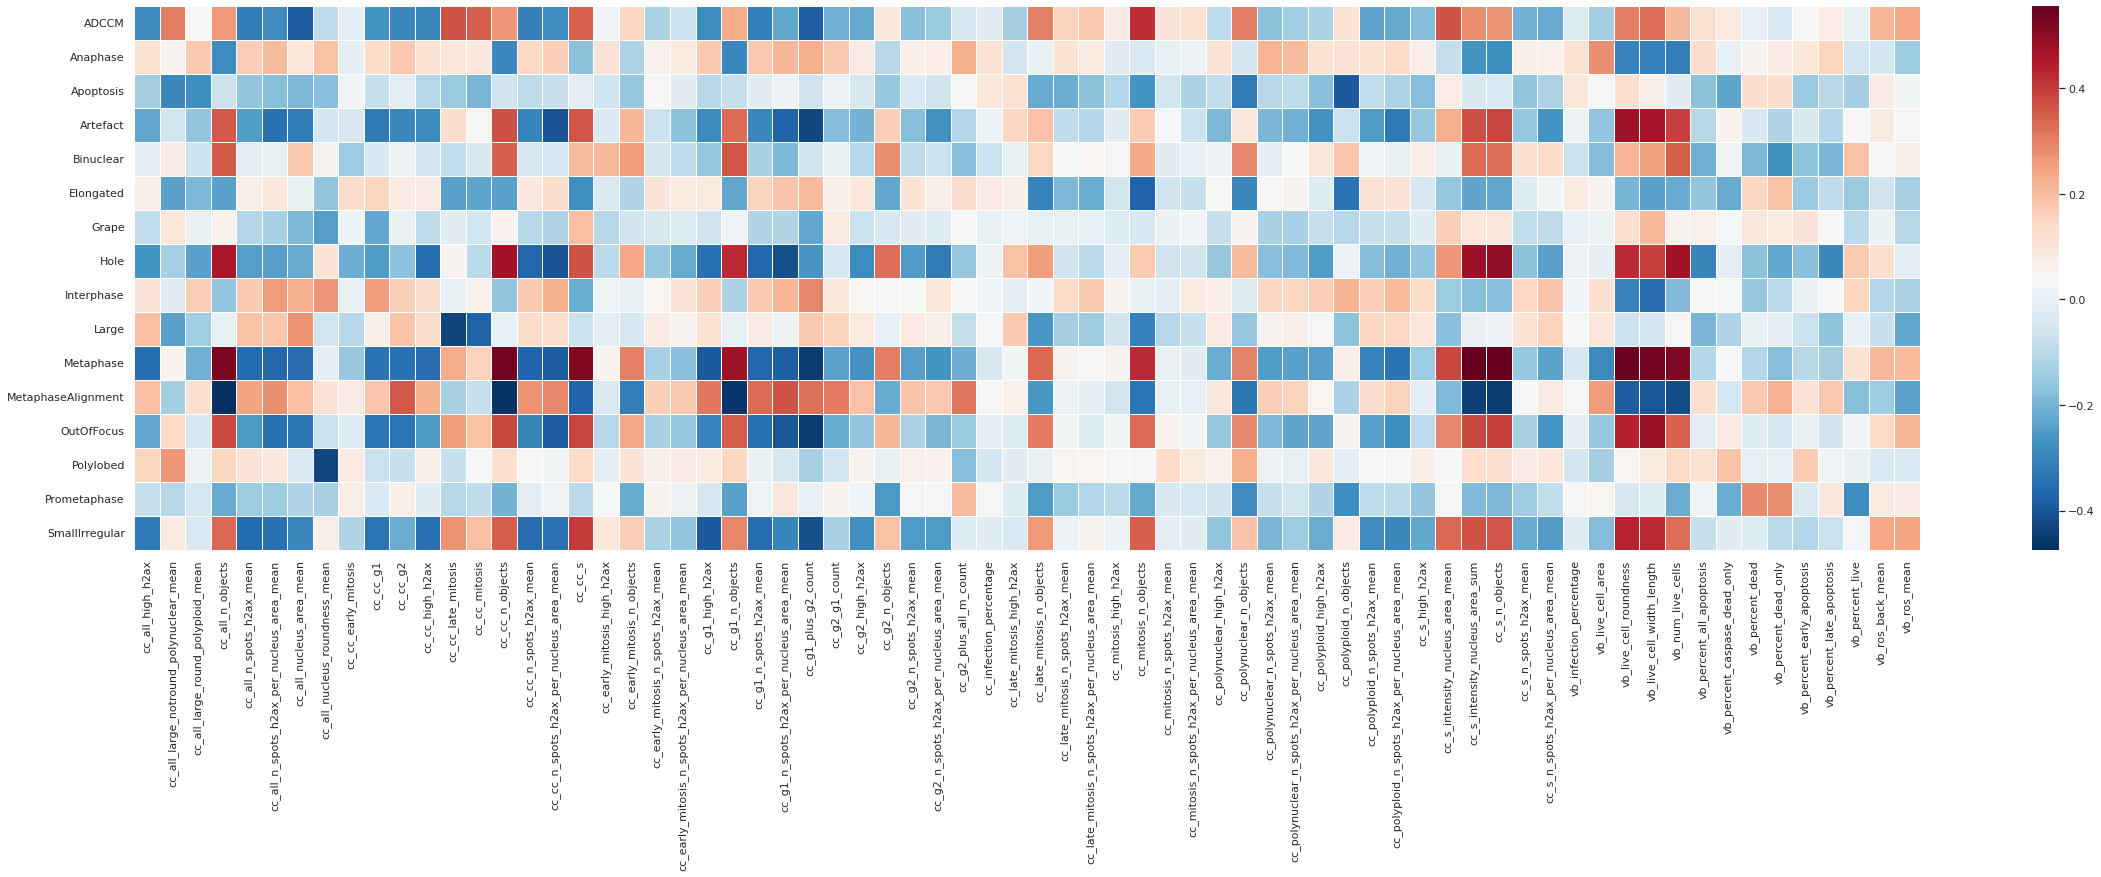

In [10]:
import seaborn as sns

sns.set(rc={'figure.figsize':(40,10)})

sns.heatmap(pearson_graph, 
            xticklabels=pearson_graph.columns,
            yticklabels=pearson_graph.index,
            cmap='RdBu_r',
            linewidth=0.5)